In [1]:
# Establish connection to Codeup database
from env import host, user, password
import os
import acquire
import accuracy_precision_recall


# data prep
import prep

# data manipulation
import pandas as pd
import numpy as np

# splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# sklearn for modeling
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# modeling
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# call telco data
df = acquire.get_telco_data()

In [3]:
# validate function works
train, validate, test = prep.prep_telco(df)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 9)
validate -> (1691, 9)
test -> (1409, 9)


In [8]:
# Which churn value has the greater val_count
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

In [9]:
# Create baseline prediction column 0 = 'no churn'
train['baseline_prediction'] = '0'

In [10]:
# Verify column was created
train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,single_line,no_phone_service,has_mult_lines,m_to_m_contract,...,not_streaming_tv,is_streaming_tv,not_streaming_movies,is_streaming_movies,is_male,has_partner,has_dependents,has_phone_serv,has_paperless_bill,baseline_prediction
5310,7503-MIOGA,1,72,89.85,6697.35,No,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
3790,5329-KRDTM,1,72,77.35,5396.25,No,0,0,1,0,...,0,1,1,0,1,1,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,No,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2635,3748-FVMZZ,0,4,40.05,162.45,No,0,1,0,1,...,1,0,0,1,1,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,No,1,0,0,1,...,1,0,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,0,72,103.40,7372.65,Yes,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
356,0523-VNGTF,1,52,50.50,2566.3,No,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
2128,3058-HJCUY,0,41,102.60,4213.35,Yes,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
3586,5081-NWSUP,0,10,64.90,685.55,No,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [11]:
X_cols = train.columns
y_cols = 'churn'

In [12]:
# drop churn out of X_cols:
drop_cols = ['churn', 'senior_citizen', 'is_male', 'customer_id', 'tenure', 'monthly_charges', 'total_charges'
, 'm_to_m_contract', 'one_yr_contract', 'two_yr_contract'
, 'dsl', 'fiber_optic', 'no_internet', 'bank_transfer'
, 'credit_card', 'e_check', 'mailed_check', 'no_online_security'
, 'has_online_secur', 'no_online_backup', 'has_online_backup'
, 'no_device_protect', 'has_device_protect', 'no_tech_support'
, 'has_tech_support', 'not_streaming_tv', 'is_streaming_tv'
, 'not_streaming_movies', 'is_streaming_movies', 'has_phone_serv'
, 'has_paperless_bill', 'no_phone_service']

In [13]:
X_cols = (X_cols.drop(drop_cols))

In [14]:
X_cols

Index(['single_line', 'has_mult_lines', 'has_partner', 'has_dependents',
       'baseline_prediction'],
      dtype='object')

In [15]:
train[y_cols].head()

5310    No
3790    No
4398    No
2635    No
2986    No
Name: churn, dtype: object

In [16]:
# make DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [17]:
# verify
clf

DecisionTreeClassifier()

In [18]:
# fit
clf.fit(train[X_cols], train[y_cols])

DecisionTreeClassifier()

In [19]:
# use decision tree to make first model
model_1_preds = clf.predict(train[X_cols])

In [20]:
# make second model
clf1 = DecisionTreeClassifier(max_depth=2)
# fit
clf1.fit(train[X_cols],train[y_cols])
# use
model_2_preds = clf1.predict(train[X_cols])

In [21]:
clf1.score(train[X_cols],train[y_cols])


0.7347197565305605

In [22]:
clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(train[X_cols],train[y_cols])

model_3_preds = clf2.predict(train[X_cols])

In [23]:
train[X_cols].head(2)

,single_line,has_mult_lines,has_partner,has_dependents,baseline_prediction
5310,0,1,1,0,0
3790,0,1,1,0,0


In [24]:
# accuracy lil more like we saw before
accuracy_score(train[y_cols], model_3_preds)

0.7347197565305605

In [25]:
clf2.score(train[X_cols], train[y_cols])

0.7347197565305605

[Text(0.5294117647058824, 0.9, 'has_dependents <= 0.5\ngini = 0.39\nsamples = 3943\nvalue = [2897, 1046]\nclass = No'),
 Text(0.29411764705882354, 0.7, 'has_partner <= 0.5\ngini = 0.431\nsamples = 2730\nvalue = [1871, 859]\nclass = No'),
 Text(0.17647058823529413, 0.5, 'has_mult_lines <= 0.5\ngini = 0.454\nsamples = 1811\nvalue = [1179, 632]\nclass = No'),
 Text(0.11764705882352941, 0.3, 'single_line <= 0.5\ngini = 0.442\nsamples = 1147\nvalue = [769, 378]\nclass = No'),
 Text(0.058823529411764705, 0.1, 'gini = 0.449\nsamples = 176\nvalue = [116, 60]\nclass = No'),
 Text(0.17647058823529413, 0.1, 'gini = 0.44\nsamples = 971\nvalue = [653, 318]\nclass = No'),
 Text(0.23529411764705882, 0.3, 'gini = 0.472\nsamples = 664\nvalue = [410, 254]\nclass = No'),
 Text(0.4117647058823529, 0.5, 'single_line <= 0.5\ngini = 0.372\nsamples = 919\nvalue = [692, 227]\nclass = No'),
 Text(0.35294117647058826, 0.3, 'has_mult_lines <= 0.5\ngini = 0.385\nsamples = 610\nvalue = [451, 159]\nclass = No'),
 Te

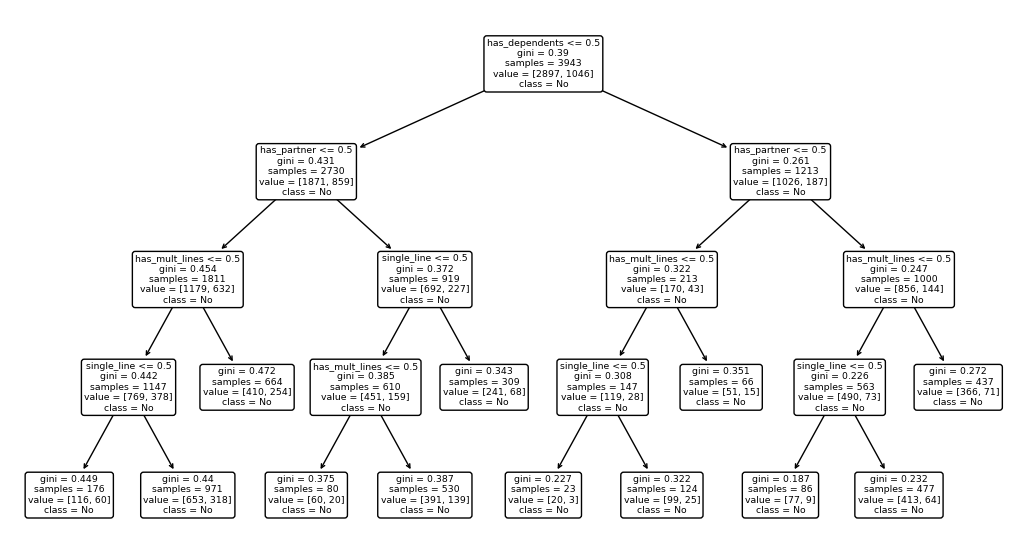

In [26]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_cols, class_names=clf.classes_, rounded=True)


In [28]:
clf.score(train[X_cols],train[y_cols])

0.7347197565305605

In [30]:
# classification report:
print(classification_report(train[y_cols],
                      model_2_preds))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      2897
         Yes       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train = train[X_cols]
y_train = train[y_cols]

rf = RandomForestClassifier()
rf.fit(X_train[['has_partner', 'has_dependents']], y_train)
rf1_preds = rf.predict(X_train[['has_partner', 'has_dependents']])

In [ ]:
X_val, y_val = validate[X_cols], validate[y_cols]